In [46]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import warnings
warnings.filterwarnings("ignore")

from xaimoo.utilities.data import label_vehicle_crash, label_two_bar_truss, label_welded_beam
from xaimoo.utilities.visualize import plot_rule_explanations
from xaimoo.explanations.rules import train_skope_rules, explain_skope_rules, train_rulefit_rules, explain_rulefit_rules, rule_to_conditions, index_rules, combine_rule_conditions, simplify_rules

def plot_helper(rules, to_consider, df, obj_names, target_category):

    rules_list = [rules[i][0] for i in to_consider]

    cons = combine_rule_conditions(rules_list)
    df["mark"] = df.apply(cons, axis=1)

    plot_rule_explanations(df, obj_names, "mark", "category", target_category, title=f"{simplify_rules(rules_list)}")

## Vehicle crash worthiness
### Skope rules

In [50]:
df_crash, var_names, obj_names = label_vehicle_crash("../data/VehicleCrash.csv")

target_category = 1

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.5, "recall_min": 0.2}  # use F1-Score
classifier = train_skope_rules(df_crash, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall)
0: x1 <= 2.01482 and x2 > 2.12398 and x3 <= 2.72992 and x4 <= 1.48559 --> (0.9207920792079208, 0.34766355140186916)
1: x1 <= 1.46928 and x3 <= 2.73 and x4 <= 1.34753 --> (0.8402061855670103, 0.28646748681898065)
2: x2 > 2.10041 and x3 <= 2.60595 and x4 <= 1.32889 --> (0.8296296296296296, 0.3936731107205624)
3: x1 <= 2.0178 and x2 > 1.65809 and x4 <= 1.32181 and x4 > 1.00177 --> (0.825, 0.3680297397769517)
4: x1 <= 1.46928 and x3 <= 2.72992 and x4 <= 1.34753 --> (0.8219895287958116, 0.28545454545454546)
5: x1 <= 2.06765 and x2 > 1.65709 and x4 <= 1.33652 and x4 > 1.00177 --> (0.8163265306122449, 0.3766478342749529)
6: x1 <= 2.30053 and x2 > 1.918 and x4 <= 1.32163 and x4 > 1.00359 --> (0.8099173553719008, 0.3385146804835924)
7: x2 > 2.19494 and x3 <= 2.75936 and x4 <= 1.32889 --> (0.795774647887324, 0.4028520499108734)
8: x1 <= 1.6153 and x3 <= 2.72215 and x4 <= 1.32945 --> (0.7777777777777778, 0.3287671232876712)
9: x1 <= 1.89321 and x2 > 1.5834 and x4 <= 1.

True positives  = 990 / 2726
True negatives  = 17155 / 17274
False positives = 119 / 1109
False negatives = 1736 / 18891


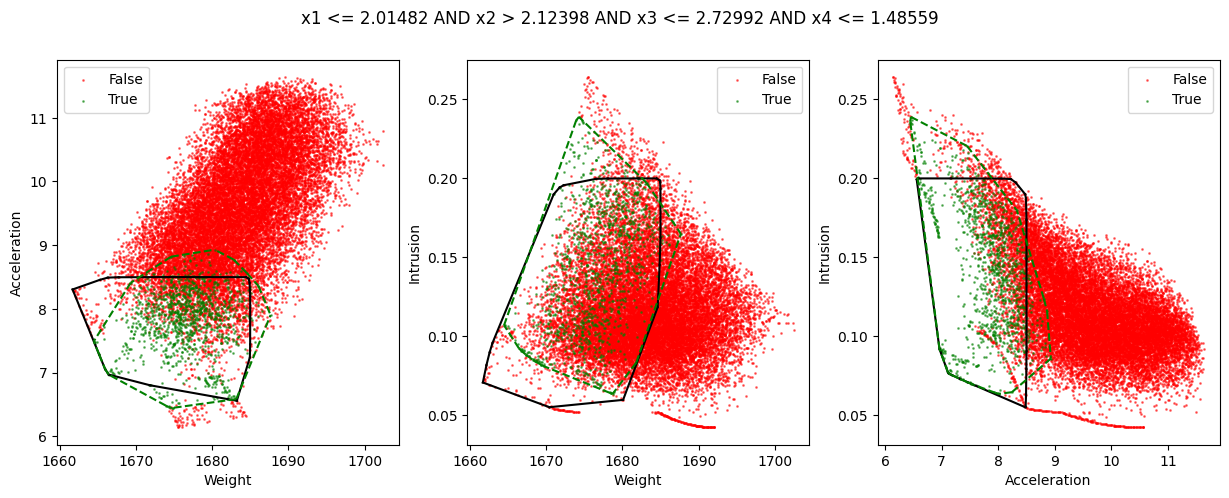

In [57]:
plot_helper(rules, [0], df_crash, obj_names, target_category)

True positives  = 322 / 2726
True negatives  = 17267 / 17274
False positives = 7 / 329
False negatives = 2404 / 19671


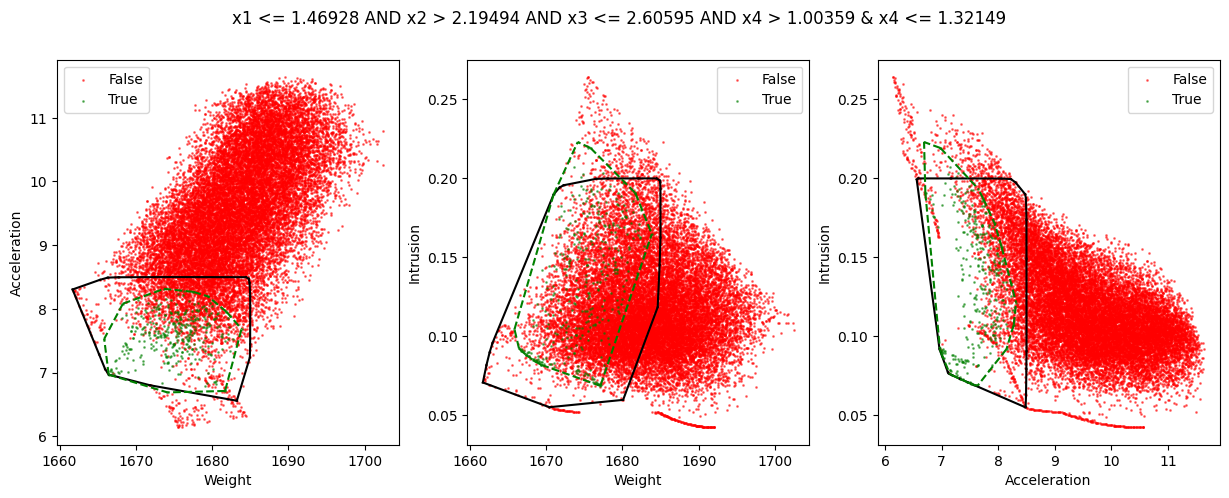

In [58]:
plot_helper(rules, range(21), df_crash, obj_names, target_category)

### Rulefit

In [29]:
rulefit_kwargs = {"tree_size": 8}
classifier = train_rulefit_rules(df_crash, var_names, target_category, classifier_kwargs=rulefit_kwargs)
rules = index_rules(explain_rulefit_rules(classifier))

Rule --> (Support, Importance)
0: x2 > 1.00441 and x3 > 1.26955 --> (0.851, 0.04800002163441924)
1: x3 > 1.3124 --> (0.83, 0.005669068331099455)
2: x4 <= 2.46132 --> (0.7404, 0.013510347627356247)
3: x4 <= 2.42816 --> (0.72375, 0.009854003822395912)
4: x4 <= 2.40268 --> (0.71075, 0.19600157852494032)
5: x4 <= 2.35488 --> (0.6857, 0.41422372861522844)
6: x3 <= 2.05837 and x4 > 2.42875 --> (0.1485, 0.40430552359481065)
7: x3 <= 1.65214 and x4 > 2.43651 --> (0.09315, 0.08663578380628406)
8: x3 <= 2.03104 and x4 > 2.55754 and x5 <= 1.79558 --> (0.04655, 0.15723791955158714)
9: x4 > 2.56407 and x5 <= 1.42142 --> (0.0442, 0.12208375377749384)
10: x2 <= 2.40037 and x3 <= 2.04618 and x4 > 2.56301 and x5 <= 1.94034 --> (0.03675, 2.686214511185556e-05)
11: x1 <= 2.47819 and x3 <= 1.45048 and x4 > 2.50999 and x5 <= 2.59801 --> (0.033, 0.09760010308110292)
12: x2 <= 1.99361 and x3 <= 2.02455 and x4 > 2.50901 and x5 <= 2.10535 --> (0.03215, 0.11108223088052198)
13: x1 <= 2.26091 and x3 <= 1.83971 a

True positives  = 142 / 839
True negatives  = 19128 / 19161
False positives = 33 / 175
False negatives = 697 / 19825


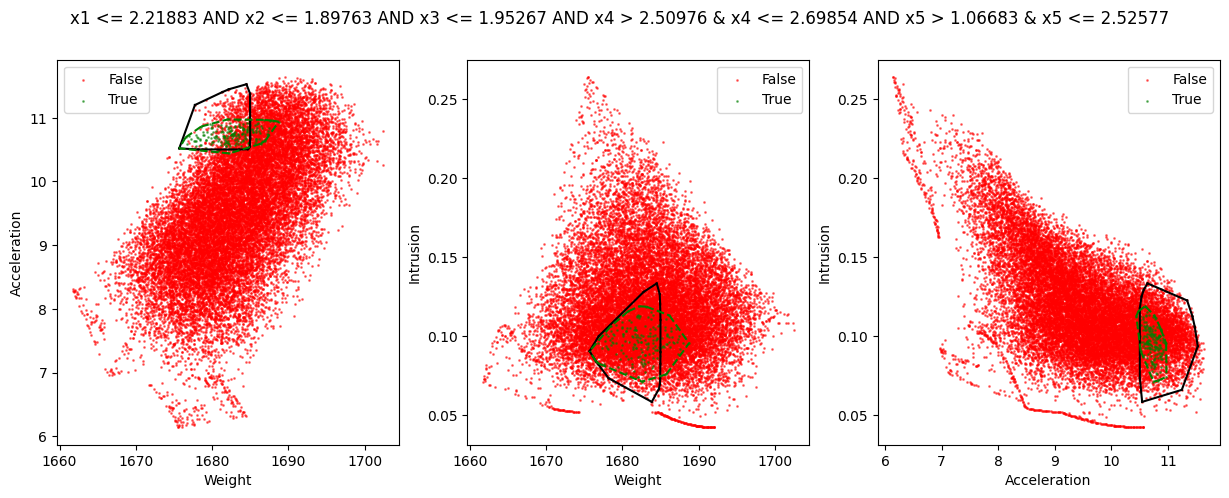

In [36]:
plot_helper(rules, [19, 20], df_crash, obj_names, target_category)

## Two-Bar Truss
### Skope-rules

In [44]:
df_twobar, var_names, obj_names = label_two_bar_truss("../data/TwoBarTruss.csv")

target_category = 1

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.5, "recall_min": 0.5}
classifier = train_skope_rules(df_twobar, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall)
0: x1 <= 0.00271 and x2 <= 0.0055 and x2 > 0.00177 --> (0.6588541666666666, 0.7620481927710844)
1: x1 <= 0.00292 and x2 <= 0.00546 and x2 > 0.00177 --> (0.6326530612244898, 0.8)
2: x1 <= 0.00283 and x2 <= 0.0055 and x2 > 0.00177 --> (0.6185819070904646, 0.7760736196319018)
3: x1 <= 0.00286 and x2 <= 0.0055 and x2 > 0.00177 --> (0.5882352941176471, 0.8191126279863481)
4: x1 <= 0.00286 and x2 <= 0.00578 and x2 > 0.00177 --> (0.5738498789346247, 0.7796052631578947)
5: x1 <= 0.00265 and x2 <= 0.00545 --> (0.5269320843091335, 0.7053291536050157)
6: x1 <= 0.00293 and x2 <= 0.00528 --> (0.5052631578947369, 0.802675585284281)


True positives  = 1124 / 1553
True negatives  = 15214 / 15775
False positives = 561 / 1685
False negatives = 429 / 15643


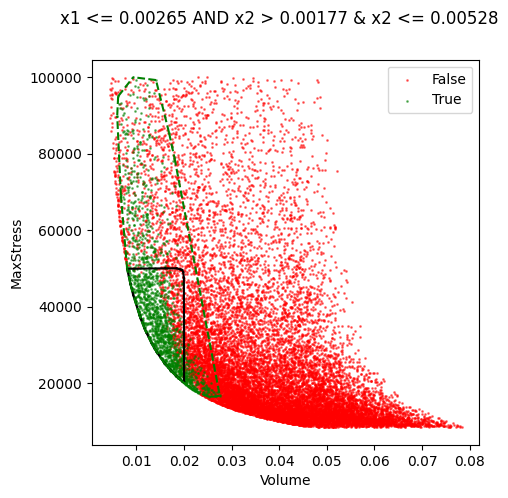

In [48]:
plot_helper(rules, range(7), df_twobar, obj_names, target_category)

True positives  = 1188 / 1553
True negatives  = 15127 / 15775
False positives = 648 / 1836
False negatives = 365 / 15492


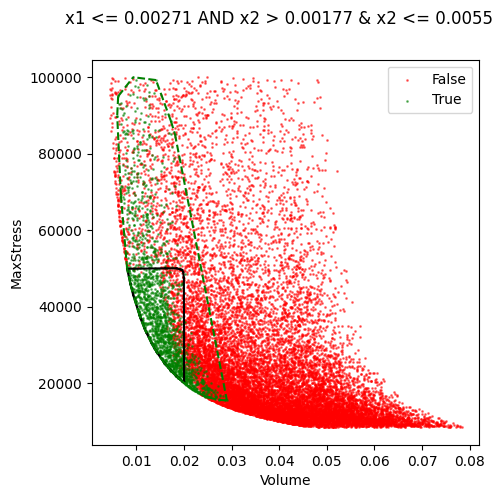

In [49]:
plot_helper(rules, [0], df_twobar, obj_names, target_category)

### Rulefit

In [ ]:
classifier = train_rulefit_rules(df_twobar, var_names, target_category)
rules = index_rules(explain_rulefit_rules(classifier))

In [ ]:
rule = rules[10][0]

con = rule_to_conditions(rule)
df_twobar["mark"] = df_twobar.apply(con, axis=1)

plot_rule_explanations(df_twobar, obj_names, "mark", "category", target_category, title=rule)

## Welded beam
### Skope rules

In [ ]:
df_beam, var_names, obj_names = label_welded_beam("../data/WeldedBeam.csv")

target_category = 3

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.5, "recall_min": 0.5}
classifier = train_skope_rules(df_beam, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

In [ ]:
rule = rules[0][0]

con = rule_to_conditions(rule)
df_beam["skope_mark"] = df_beam.apply(con, axis=1)

plot_rule_explanations(df_beam, obj_names, "skope_mark", "category", target_category, title=rule)

### Rulefit

In [ ]:
classifier = train_rulefit_rules(df_beam, var_names, target_category)
rules = index_rules(explain_rulefit_rules(classifier))

In [ ]:
rule = rules[4][0]

con = rule_to_conditions(rule)
df_beam["mark"] = df_beam.apply(con, axis=1)

plot_rule_explanations(df_beam, obj_names, "mark", "category", target_category, title=rule)